In [1]:
# !pip install bioinfokit
# !pip install umap-learn
# !pip install hdbscan

In [2]:
# Data Science Tools
import bioinfokit as bik
from bioinfokit.analys import norm
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.io import mmread
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

# Bioinfotools
import bioinfokit as bik
from bioinfokit import analys, visuz
import TCRscape

# Dimension reduction and clustering libraries
from sklearn.decomposition import PCA
import umap.umap_ as umap
import hdbscan

pd.options.mode.chained_assignment = None

In [3]:
E6_1 = TCRscape.ReadRhapsody('./P53-HPV_SampleTag07_hs_RSEC_MolsPerCell_MEX','E6')
E6_2 = TCRscape.ReadRhapsody('./P53-HPV_SampleTag10_hs_RSEC_MolsPerCell_MEX','E6')

E7_1 = TCRscape.ReadRhapsody('./P53-HPV_SampleTag01_hs_RSEC_MolsPerCell_MEX','E7')
E7_2 = TCRscape.ReadRhapsody('./P53-HPV_SampleTag12_hs_RSEC_MolsPerCell_MEX','E7')

p53_1 = TCRscape.ReadRhapsody('./P53-HPV_SampleTag08_hs_RSEC_MolsPerCell_MEX','p53')
p53_2 = TCRscape.ReadRhapsody('./P53-HPV_SampleTag09_hs_RSEC_MolsPerCell_MEX','p53')
p53_3 = TCRscape.ReadRhapsody('./P53-HPV_SampleTag11_hs_RSEC_MolsPerCell_MEX','p53')

In [4]:
merged = TCRscape.MergeRhapsody([E6_1,E6_2,E7_1,E7_2,p53_1,p53_2,p53_3])
merged

,ADA,ADGRE1,ADGRG3,AIM2,ANXA5,AOC3,APOBEC3G,AQP9,ARG1,ARL4C,...,S100A12,THBD,TREM1,VPREB3,CCL2,BPI,CCR10,CD1B,PI3,CD1A
Cell_Index,,,,,,,,,,,,,,,,,,,,,
50084,7,0,0,0,9,0,0,0,1.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56865,7,0,0,1,3,0,6,0,0.0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59557,1,0,0,0,0,0,10,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61317,7,0,0,3,6,0,9,0,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77731,0,0,0,6,3,0,1,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56439707,5,0,0,0,10,0,2,0,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56456846,2,0,0,0,2,0,8,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56523990,2,0,0,0,11,0,2,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
norm =  TCRscape.LogNormalize(merged)
norm

,ADA,ADGRE1,ADGRG3,AIM2,ANXA5,AOC3,APOBEC3G,AQP9,ARG1,ARL4C,...,VPREB3,CCL2,BPI,CCR10,CD1B,PI3,CD1A,Sample_E6,Sample_E7,Sample_p53
Cell_Index,,,,,,,,,,,,,,,,,,,,,
50084,4.296825,0.0,0.0,0.000000,4.394378,0.0,0.000000,0.0,11.512925,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
56865,4.296825,0.0,0.0,4.911288,3.295766,0.0,3.657852,0.0,0.000000,4.092856,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
59557,2.350914,0.0,0.0,0.000000,0.000000,0.0,4.168678,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
61317,4.296825,0.0,0.0,6.009900,3.988913,0.0,4.063318,0.0,0.000000,3.399708,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
77731,0.000000,0.0,0.0,6.703047,3.295766,0.0,1.866093,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56439707,3.960352,0.0,0.0,0.000000,4.499739,0.0,2.559240,0.0,0.000000,3.399708,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
56456846,3.044062,0.0,0.0,0.000000,2.890301,0.0,3.945535,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
56523990,3.044062,0.0,0.0,0.000000,4.595049,0.0,2.559240,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [6]:
T = TCRscape.GateTcells(norm)
T

,ADA,ADGRE1,ADGRG3,AIM2,ANXA5,AOC3,APOBEC3G,AQP9,ARG1,ARL4C,...,VPREB3,CCL2,BPI,CCR10,CD1B,PI3,CD1A,Sample_E6,Sample_E7,Sample_p53
Cell_Index,,,,,,,,,,,,,,,,,,,,,
50084,4.296825,0.0,0.0,0.000000,4.394378,0.0,0.000000,0.0,11.512925,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
56865,4.296825,0.0,0.0,4.911288,3.295766,0.0,3.657852,0.0,0.000000,4.092856,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
59557,2.350914,0.0,0.0,0.000000,0.000000,0.0,4.168678,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
61317,4.296825,0.0,0.0,6.009900,3.988913,0.0,4.063318,0.0,0.000000,3.399708,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
77731,0.000000,0.0,0.0,6.703047,3.295766,0.0,1.866093,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56439707,3.960352,0.0,0.0,0.000000,4.499739,0.0,2.559240,0.0,0.000000,3.399708,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
56456846,3.044062,0.0,0.0,0.000000,2.890301,0.0,3.945535,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
56523990,3.044062,0.0,0.0,0.000000,4.595049,0.0,2.559240,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [7]:
CD8 = TCRscape.GateCD8(T)
CD8

,ADA,ADGRE1,ADGRG3,AIM2,ANXA5,AOC3,APOBEC3G,AQP9,ARG1,ARL4C,...,VPREB3,CCL2,BPI,CCR10,CD1B,PI3,CD1A,Sample_E6,Sample_E7,Sample_p53
Cell_Index,,,,,,,,,,,,,,,,,,,,,
50084,4.296825,0.0,0.0,0.000000,4.394378,0.0,0.000000,0.0,11.512925,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
56865,4.296825,0.0,0.0,4.911288,3.295766,0.0,3.657852,0.0,0.000000,4.092856,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
59557,2.350914,0.0,0.0,0.000000,0.000000,0.0,4.168678,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
61317,4.296825,0.0,0.0,6.009900,3.988913,0.0,4.063318,0.0,0.000000,3.399708,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
77731,0.000000,0.0,0.0,6.703047,3.295766,0.0,1.866093,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56439707,3.960352,0.0,0.0,0.000000,4.499739,0.0,2.559240,0.0,0.000000,3.399708,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
56456846,3.044062,0.0,0.0,0.000000,2.890301,0.0,3.945535,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
56523990,3.044062,0.0,0.0,0.000000,4.595049,0.0,2.559240,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [8]:
AIRR = pd.read_csv("P53-HPV_Dominant_Contigs_AIRR.tsv",
                 sep='\t',
                 low_memory=False)

AIRR['cell_id'] = AIRR['cell_id'].dropna()
AIRR['locus'] = AIRR['locus'].dropna()
AIRR['sequence_aa'] = AIRR['sequence_aa'].dropna()
AIRR['sequence_aa'] = AIRR['sequence_aa'].astype(str)
AIRR['cdr3_aa'] = AIRR['cdr3_aa'].dropna()
AIRR['sequence_aa'] = AIRR['sequence_aa'].astype(str)

AIRR

,cell_id,cell_type_experimental,high_quality_cell,locus,sequence_id,consensus_count,umi_count,sequence,sequence_length,sequence_aa,...,fwr3,fwr3_aa,fwr4,fwr4_aa,cdr1,cdr1_aa,cdr2,cdr2_aa,cdr3,cdr3_aa
0,25,T_CD8_memory,False,TRB,25_TRB_7,467,2,TTGTTTTGTTTTGTTTGTTAAGCTCTTTCCTGGACTCTTTCTACAG...,485,CFVLFVKLFPGLFLQHLFLSLTDSFHAKVTQTPGHLVKGKGQKTKM...,...,CTTCAAGAAACGGAGATGCACAAGAAGCGATTCTCATCTCAATGCC...,LQETEMHKKRFSSQCPKNAPCSLAILSSEPGDTALYLC,TTTGGTGATGGGACTCGACTCTCCATCCTA,W*WDSTLHP,AAAGGACATACTTTT,KGHTF,TTTCAGAATGAACAAGTT,FQNEQV,GCCAGCAGTCACCCGGTGGGGGCGAAATCAGCCCCAGCAT,ASSHPVGAKSAPA
1,1454,T_CD8_memory,True,TRB,1454_TRB_1,284,6,GGGATGCTTACTACAGAGACACCAGCCCCAAGCTAGGAGATCCTGC...,506,DAYYRDTSPKLGDPAMGFRLLCCVAFCLLGAGPVDSGVTQTPKHLI...,...,AGAGCAAAAGGAAACATTCTTGAACGATTCTCCGCACAACAGTTCC...,RAKGNILERFSAQQFPDLHSELNLSSLELGDSALYFC,TTCGGGCCGGGCACCAGGCTCACGGTCACA,FGPGTRLTVT,TCTGGAGACCTCTCT,SGDLS,TATTATAATGGAGAAGAG,YYNGEE,GCCAGCAGCGTAGCTTACAGGGGCCACGAGCAGTAC,ASSVAYRGHEQY
2,1613,T_CD8_memory,True,TRA,1613_TRA_1,4763,37,GGGGATCCACTGAGCCTCCTCCCTGCAGCTGGCTGATGTAGCTCAC...,738,GDPLSLLPAAG*CSSLVSV*IGSCDENKRSEHIQAP*EKAFL*PFL...,...,AAAGGCATCAACGGTTTTGAGGCTGAATTTAAGAAGAGTGAAACCT...,KGINGFEAEFKKSETSFHLTKPSAHMSDAAEYFC,TTTGGCCAAGGAACCAGGCTGACTATCAACCCA,FGQGTRLTINP,TCGTCTGTTCCACCATAT,SSVPPY,TACACATCAGCGGCCACCCTGGTT,YTSAATLV,GCTGCTCAGGGAGCCCAGAAGCTGGTA,AAQGAQKLV
3,1613,T_CD8_memory,True,TRB,1613_TRB_1,5488,41,GTATGGGGGAAGCATTTGTGGAGACAATGATGTCACTGTAGGAACT...,607,YGGSICGDNDVTVGTSL*GQQHPTSSAPAHSDPDLAKLPSCPDPAM...,...,GTAGACGATTCACAGTTGCCTAAGGATCGATTTTCTGCAGAGAGGC...,VDDSQLPKDRFSAERLKGVDSTLKIQPAELGDSAVYLC,TTCGGTTCGGGGACCAGGTTAACCGTTGTA,FGSGTRLTVV,TCTGGCCACAATACC,SGHNT,TATGAGAATGAGGAAGCA,YENEEA,GCCAGCAGCTTTAGTGTTAGGGACCAACGAGACTATGGCTACACC,ASSFSVRDQRDYGYT
4,2726,T_CD8_memory,True,TRA,2726_TRA_1,265,3,TGCATCCACCGAATTATTCGTTGTAGTTATGGGGGATCCAGACTGA...,609,CIHRIIRCSYGGSRLSFLPSPT*SVYLLQTPMAQELGMQCQARGIL...,...,GAGGAGAAAGGTCGTTTTTCTTCATTCCTTAGTCGGTCTAAAGGGT...,EEKGRFSSFLSRSKGYSYLLLKELQMKDSASYLC,TTTGGAAAGGGCACAAGACTTTCTGTGATTGCA,FGKGTRLSVIA,ACATCTGGGTTCAACGGG,TSGFNG,AATGTTCTGGATGGTTTG,NVLDGL,GCTGGGTATTCAGGAAACACACCTCTTGTC,AGYSGNTPLV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67175,56617667,T_gamma_delta,True,TRG,56617667_TRG_1,2659,27,CTGCTGTGGGACTGCCCCCTCCTAGGGCTGGGCCTGCTGACTCCAG...,846,AVGLPPPRAGPADSRVCFPHLCTPSAAGLSSPCPWLSSAEGLLSAA...,...,GTGTTGGAATCAGGAGTCAGTCCAGGGAAGTATTATACTTACGCAA...,VLESGVSPGKYYTYASTRNNLRLILRNLIENDSGVYYC,TTTGGCAGTGGAACAACACTTGTTGTCACA,FGSGTTLVVT,GAAGGAAGTAACGGCTAC,EGSNGY,TATGACTCCTACAACTCCAAGGTT,YDSYNSKV,GCCACCTGGGACGGGCAAGGTTATAAGAAACTC,ATWDGQGYKKL
67176,56618448,T_CD8_memory,True,TRA,56618448_TRA_1,2074,24,GTATGGGGGATTCTTACCAAAACAAGAGACTTGCCTAGCCCAACCT...,637,YGGFLPKQETCLAQPSSRSLFSRPGFQPLSYWPRGEFPKRRLQCFH...,...,AAAGGCATCAAGGGCTTTGAGGCTGAATTTATAAAGAGTAAATTCT...,KGIKGFEAEFIKSKFSFNLRKPSVQWSDTAEYFC,TTTGGAAGAGGAACTCAGTTGACTGTCTGGCCT,FGRGTQLTVWP,TATGGTGGAACTGTTAAT,YGGTVN,TACTTTTCAGGGGATCCACTGGTT,YFSGDPLV,GCCGTGATTCCCCCAGGCTCAACCCTGGGGAGGCTATAC,AVIPPGSTLGRLY
67177,56618448,T_CD8_memory,True,TRB,56618448_TRB_2,18130,91,TATGGGGGCTGTCCTGTCTCCTCATCTGCAAAATTAGGAAGCCTGT...,649,MGAVLSPHLQN*EACLDYLQEPPTSSFQPLTNSAH*ARRSPRAKSL...,...,TTTCAGAAAGGAGATATAGCTGAAGGGTACAGCGTCTCTCGGGAGA...,FQKGDIAEGYSVSREKKESFPLTVTSAQKNPTAFYLC,TTCGGGCCGGGCACCAGGCTCACGGTCACA,FGPGTRLTVT,TTGAACCACGATGCC,LNHDA,TCACAGATAGTAAATGAC,SQIVND,GCCAGTAATTCCGTATGGGGAGGCGAGCAGTAC,ASNSVWGGEQY
67178,56619358,T_CD8_memory,True,TRA,56619358_TRA_1,322,9,GGGAGTGATGCCCTCTGCTAGGCCAGAGACACTAACAATGAACTCC...,490,GVMPSARPETLTMNSSLDFLILILMFGGTSSNSVKQTGQITVSEGA...,...,AACAGCAAAAACTTCGGAGGCGGAAATATTAAAGACAAAAACTCCC...,NSKNFGGGNIKDKNSPIVKYSVQVSDSAVYYC,TTTGGCGCAGGAACCATTCTGAGAGTCAAGTCC,FGAGTILRVKS,TCCACGGGGTACCCTACC,STGYPT,GAGACAATGGAA,ETME,CTTCTGGAATATGGAAACAAGCTGGTC,LLEYGNKLV


In [9]:
e6 = CD8[CD8['Sample_E6'] == 1]
e7 = CD8[CD8['Sample_E7'] == 1]
p53 = CD8[CD8['Sample_p53'] == 1]

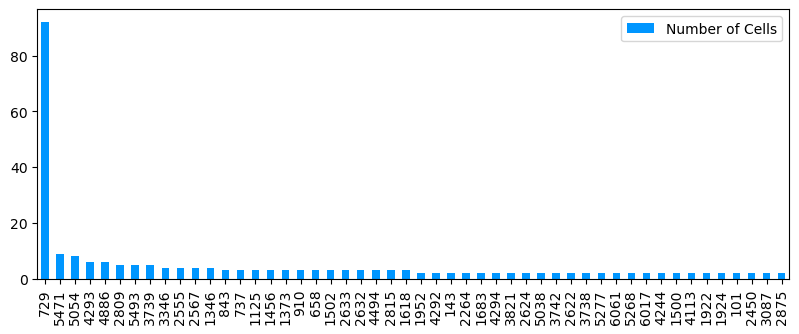

In [10]:
Clonotypes = TCRscape.CountClonotypes(e6, AIRR)

# Visualize and save Top 50 AB-Clonotypes
vis = Clonotypes.iloc[:50,:]
vis.plot(kind='bar',y='Number of Cells',color='#0096FF',figsize=(9.7,3.5))
plt.savefig('Clonotypes E6.png', dpi=600, bbox_inches='tight')
# Clonotypes.to_excel('Clonotypes.xlsx')
Clonotypes.to_csv('Clonotypes E6.csv')
plt.show()

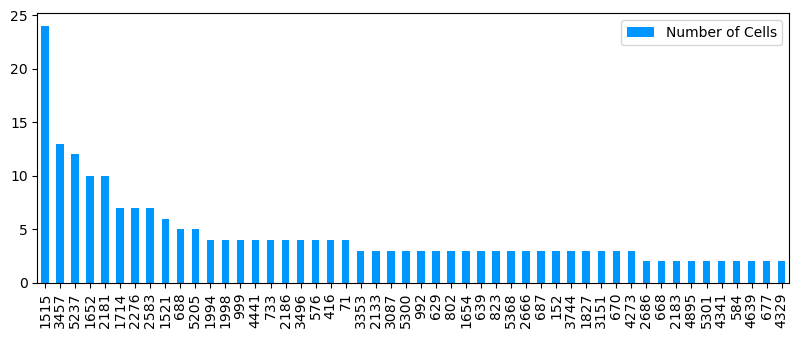

In [27]:
Clonotypes = TCRscape.CountClonotypes(e7, AIRR)

# Visualize and save Top 50 AB-Clonotypes
vis = Clonotypes.iloc[:50,:]
vis.plot(kind='bar',y='Number of Cells',color='#0096FF',figsize=(9.7,3.5))
plt.savefig('Clonotypes E7.png', dpi=600, bbox_inches='tight')
# Clonotypes.to_excel('Clonotypes.xlsx')
Clonotypes.to_csv('Clonotypes E7.csv')
plt.show()

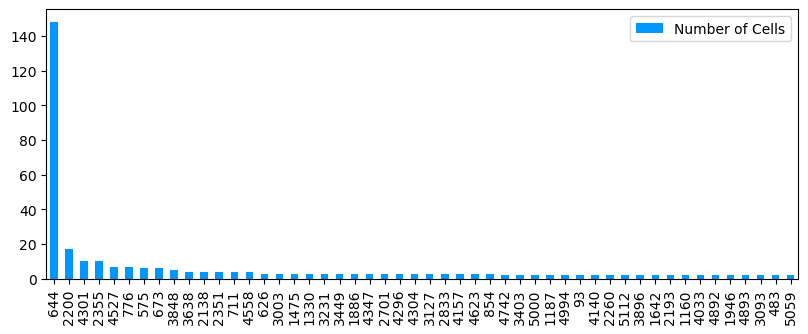

In [12]:
Clonotypes = TCRscape.CountClonotypes(p53, AIRR)

# Visualize and save Top 50 AB-Clonotypes
vis = Clonotypes.iloc[:50,:]
vis.plot(kind='bar',y='Number of Cells',color='#0096FF',figsize=(9.7,3.5))
plt.savefig('Clonotypes P53.png', dpi=600, bbox_inches='tight')
# Clonotypes.to_excel('Clonotypes.xlsx')
Clonotypes.to_csv('Clonotypes P53.csv')
plt.show()

In [16]:
e7

,ADA,ADGRE1,ADGRG3,AIM2,ANXA5,AOC3,APOBEC3G,AQP9,ARG1,ARL4C,...,VPREB3,CCL2,BPI,CCR10,CD1B,PI3,CD1A,Sample_E6,Sample_E7,Sample_p53
Cell_Index,,,,,,,,,,,,,,,,,,,,,
1454,0.000000,0.0,0.0,6.009900,4.143064,0.0,3.812003,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3866,2.350914,0.0,0.0,4.911288,2.890301,0.0,2.964705,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7880,2.350914,0.0,0.0,0.000000,2.197154,0.0,3.812003,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
23743,3.044062,0.0,0.0,0.000000,3.988913,0.0,4.574143,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
39654,3.044062,0.0,0.0,0.000000,2.197154,0.0,4.263988,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56590952,3.960352,0.0,0.0,0.000000,3.295766,0.0,3.812003,0.0,0.0,3.399708,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
56593937,3.449527,0.0,0.0,0.000000,4.394378,0.0,2.559240,0.0,0.0,3.399708,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
56598104,3.960352,0.0,0.0,0.000000,0.000000,0.0,2.964705,0.0,0.0,4.786003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


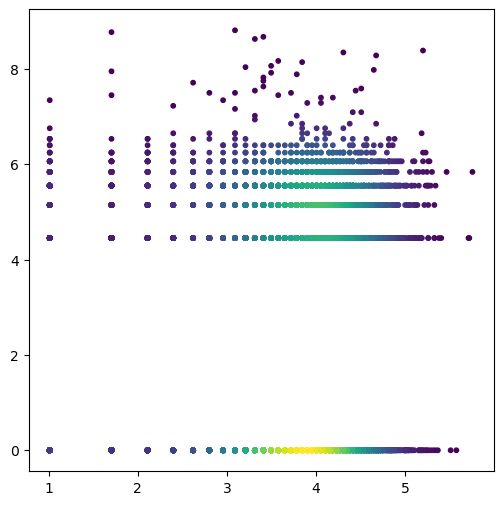

In [14]:
from scipy.stats import gaussian_kde

# Markers
x = e7["CD8A"]
y = e7["Dextramer_HPV_16_Е7|pAbO"]

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(x, y, c=z, s=10)
plt.show()

In [20]:
# Gate cell population
gated = e7

# gated = gated[gated['Dextramer_HPV_16_Е7|pAbO'] > 2.5]
# gated = gated[gated['CD8A'] > 1]

gated

,ADA,ADGRE1,ADGRG3,AIM2,ANXA5,AOC3,APOBEC3G,AQP9,ARG1,ARL4C,...,VPREB3,CCL2,BPI,CCR10,CD1B,PI3,CD1A,Sample_E6,Sample_E7,Sample_p53
Cell_Index,,,,,,,,,,,,,,,,,,,,,
1454,0.000000,0.0,0.0,6.009900,4.143064,0.0,3.812003,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3866,2.350914,0.0,0.0,4.911288,2.890301,0.0,2.964705,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7880,2.350914,0.0,0.0,0.000000,2.197154,0.0,3.812003,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
23743,3.044062,0.0,0.0,0.000000,3.988913,0.0,4.574143,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
39654,3.044062,0.0,0.0,0.000000,2.197154,0.0,4.263988,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56590952,3.960352,0.0,0.0,0.000000,3.295766,0.0,3.812003,0.0,0.0,3.399708,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
56593937,3.449527,0.0,0.0,0.000000,4.394378,0.0,2.559240,0.0,0.0,3.399708,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
56598104,3.960352,0.0,0.0,0.000000,0.000000,0.0,2.964705,0.0,0.0,4.786003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


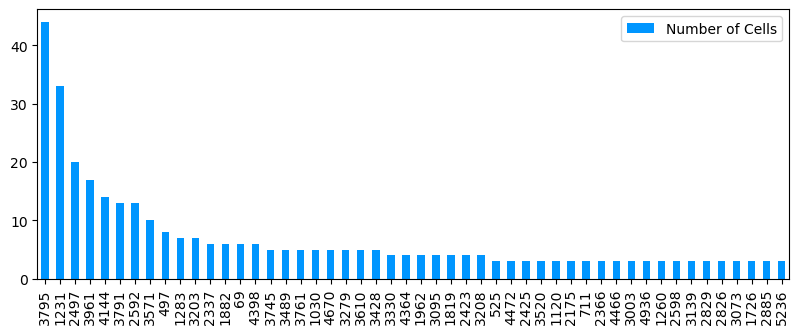

In [21]:
Counts = TCRscape.CountCDR3(gated, AIRR)

# Visualize and save Top 50 AB-Clonotypes
vis = Counts.iloc[:50,:]
vis.plot(kind='bar',y='Number of Cells',color='#0096FF',figsize=(9.7,3.5))
plt.savefig('CDR3 Counts E7.png', dpi=600, bbox_inches='tight')
# AB_counts.to_excel('Clonotypes.xlsx')
Counts.to_csv('CDR3 Counts E7.csv')
plt.show()

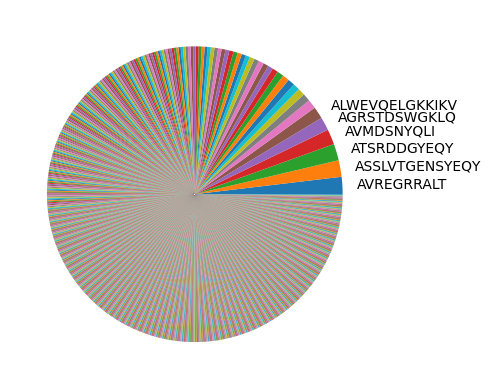

In [26]:
# CDR3 filter - minimum number of cells with the same CDR3 
min_CDR3 = 2

# Optional - Remove non top-X CDR3s
CDR3_top = 6

E7_pie = TCRscape.CDR3pie(gated, AIRR, min_CDR3, CDR3_top)

In [ ]:
# Minimum clonotypes
min_clones = 2

# Featurs to use for clustering
features_to_cluster = ['CD4', 'CD8A', 'NKG7', # T-cell type
                       'FOXP3', # Treg
                       # 'SELL','SELL','IL7R','CCR7', 'IL2RA', # T-cell type markers
                       'Dextramer_HPV_16_E6|pAbO', 'Dextramer_HPV_16_Е7|pAbO', 'Dextramer_p53_Y220C|pAbO',
                       'Sample_E6','Sample_E7','Sample_p53'
                      ]

In [ ]:
df = TCRscape.TCRscape(CD8, AIRR, features_to_cluster, min_clones)
df

In [ ]:
X = df

# Plot background color
plt.rcParams['axes.facecolor'] = 'white'
# plt.rcParams['axes.facecolor'] = 'black'

# PCA
pca = PCA(n_components=10)
pca_fit = pca.fit(X.T)
PC_values = np.arange(pca.n_components_) + 1
plt.figure(figsize=(5,5.045))
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='#0096FF')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.savefig('Scree Plot.png', dpi=600, bbox_inches='tight')
plt.show()

In [ ]:
n_components = 2 # From the Scree Plot

# UMAP
clusterable_embedding = umap.UMAP(
                                  n_neighbors=5,
                                  min_dist=0.1,
                                  n_components=n_components,
                                  random_state=14,
                                 ).fit_transform(X)
plt.figure(figsize=(5,5))
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],
             s=15, cmap='Spectral')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

In [ ]:
#UMAP Feature plot

feature = df["Sample_E6"]

plt.figure(figsize=(5.05,5))
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],
            c = feature, cmap = "bwr", s = 15)

plt.title("Sample E6")
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

plt.savefig('TCRscape Sample E6.png', dpi=600, bbox_inches='tight')

In [ ]:
#UMAP Feature plot

feature = df["Sample_E7"]

plt.figure(figsize=(5.05,5))
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],
            c = feature, cmap = "bwr", s = 15)

plt.title("Sample E7")
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

plt.savefig('TCRscape Sample E7.png', dpi=600, bbox_inches='tight')

In [ ]:
#UMAP Feature plot

feature = df["Sample_p53"]

plt.figure(figsize=(5.05,5))
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],
            c = feature, cmap = "bwr", s = 15)

plt.title("Sample p53")
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

plt.savefig('TCRscape Sample p53.png', dpi=600, bbox_inches='tight')

In [ ]:
#UMAP Feature plot

feature = df["CD8A"]

plt.figure(figsize=(6.275,5))
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],
            c = feature, cmap = "bwr", s = 15)

plt.title("CD8A")
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

plt.colorbar()

plt.savefig('TCRscape CD8A.png', dpi=600, bbox_inches='tight')

In [ ]:
#UMAP Feature plot

feature = df["FOXP3"]

plt.figure(figsize=(6.25,5))
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],
            c = feature, cmap = "bwr", s = 15)

plt.title("FOXP3")
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

plt.colorbar()

plt.savefig('TCRscape FOXP3.png', dpi=600, bbox_inches='tight')

In [ ]:
#UMAP Feature plot

feature = df["TCR_Type"]


plt.figure(figsize=(6.25,5))
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],
            c = feature, cmap = "bwr", s = 15)

plt.title("AB TCR")
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

plt.colorbar()

plt.savefig('TCRscape TCR Type.png', dpi=600, bbox_inches='tight')

In [ ]:
#UMAP Feature plot

feature = df["Number of Cells"]

plt.figure(figsize=(6.278,5))
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],
            c = feature, cmap = "bwr", s = 15)

plt.title("Number of Cells Per Clonotype")
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

plt.colorbar()

plt.savefig('TCRscape Number of Cells Per Clonotype.png', dpi=600, bbox_inches='tight')

In [ ]:
#UMAP Feature plot

feature = df['Dextramer_HPV_16_E6|pAbO']


plt.figure(figsize=(6.25,5))
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],
            c = feature, cmap = "bwr", s = 15)

plt.title("Dextramer HPV 16 Е6")
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

plt.colorbar()

plt.savefig('TCRscape Dextramer_HPV_16_E6.png', dpi=600, bbox_inches='tight')

In [ ]:
#UMAP Feature plot

feature = df['Dextramer_HPV_16_Е7|pAbO']


plt.figure(figsize=(6.25,5))
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],
            c = feature, cmap = "bwr", s = 15)

plt.title("Dextramer HPV 16 Е7")
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

plt.colorbar()

plt.savefig('TCRscape HPV_16_Е7.png', dpi=600, bbox_inches='tight')

In [ ]:
#UMAP Feature plot

feature = df['Dextramer_p53_Y220C|pAbO']


plt.figure(figsize=(6.25,5))
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],
            c = feature, cmap = "bwr", s = 15)

plt.title("Dextramer p53 Y220C")
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

plt.colorbar()

plt.savefig('TCRscape Dextramer_p53_Y220C.png', dpi=600, bbox_inches='tight')